# National Flood Insurance Claims in the Delaware Bay

**Sam Fielding, Marine Policy PhD student**

*2019-12-05*

Using FEMA's public National Flood Insurance Program (NFIP) claims data, I examine which areas of the Delaware Bay have a greater propensity for flood damage. I further look at the shoreline type (as classsified by NOAA's Environmental Sensitivity Index (ESI)), to see if there is any relationship in coastal type and flood damage. 

Future work can apply predictive models to determine which factors most contribute to flood insurance claims, and test whether coastal structure (eg seawalls vs natural vegetation) play any defensive role.

## Prepare packages and load data

In [1]:
# load packages

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gp

In [11]:
os.getcwd()

'/home/samuel/Documents/research'

In [10]:
os.chdir("/home/samuel/Documents/research")

In [12]:
# load up data

# National Flood Insurance Program claims data
# https://www.fema.gov/media-library/assets/documents/180374

nfip_file = "data/NFIP_Claims/openFEMA_claims20190630.csv"
claims = pd.read_csv(nfip_file)

# demographics from American Community Survey
# https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml

# shapefiles for census tracts
# https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html
de_file = "data/DE_data/DE_tl_2019_10_tract/tl_2019_10_tract.shp"
nj_file = "data/DE_data/NJ_tl_2019_34_tract/tl_2019_34_tract.shp"
pa_file = "data/DE_data/PA_tl_2019_42_tract/tl_2019_42_tract.shp"

de_shp = gp.read_file(de_file)
pa_shp = gp.read_file(pa_file)
nj_shp = gp.read_file(nj_file)

/home/samuel/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,11,15,22,23,31,32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
# load up data, pt 2

# Shoreline characterization, NOAA Environmental Sensitivity Index for Delaware Bay
# https://response.restoration.noaa.gov/esi_download

import fiona
fiona.listlayers('data/DE_data/DE_NJ_PA_2014_ESI/DE_NJ_PA_2014_GDB/DelawareBay_ESI.gdb/')

['benthic_polygon',
 'birds_polygon',
 'esip_polygon',
 'fish_polygon',
 'habitats_polygon',
 'hydro_annotation_soc',
 'hydro_annotation_geog',
 'hydro_annotation_hydro',
 'hydro_polygon',
 'invert_polygon',
 'm_mammal_polygon',
 'mgt_polygon',
 'nests_point',
 'soceconl_arc',
 'reptiles_polygon',
 'soceconp_point',
 't_mammal_polygon',
 'hydrol',
 'bio_lut',
 'biofile',
 'breed_dt',
 'soc_dat',
 'soc_lut',
 'sources',
 'esil_arc',
 'fishl_arc',
 'index']

In [14]:
de_bay_esi = gp.read_file('data/DE_data/DE_NJ_PA_2014_ESI/DE_NJ_PA_2014_GDB/DelawareBay_ESI.gdb/', layer = 'esil_arc')

## Initial check out of some data

**census tract files**

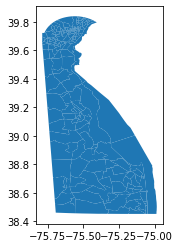

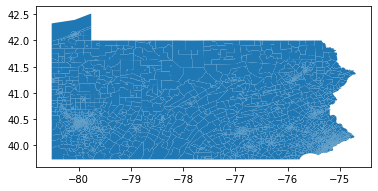

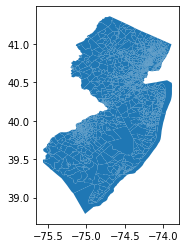

In [15]:
de_shp.plot(),
pa_shp.plot(),
nj_shp.plot();

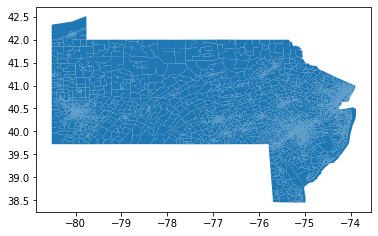

In [16]:
# join shapefiles into one
states = [de_shp, pa_shp, nj_shp]

de_bay_shp = gp.GeoDataFrame(pd.concat(states, ignore_index = True), crs = states[0].crs)
de_bay_shp.plot();

In [17]:
de_bay_shp.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,10,003,010800,10003010800,108,Census Tract 108,G5020,S,6108568,24965,+39.7777142,-075.5264969,"POLYGON ((-75.54492 39.77764, -75.54483 39.777..."
1,10,005,051007,10005051007,510.07,Census Tract 510.07,G5020,S,10284652,4825988,+38.6944980,-075.1130691,"POLYGON ((-75.13420 38.70986, -75.13420 38.709..."
2,10,005,050408,10005050408,504.08,Census Tract 504.08,G5020,S,60539945,443422,+38.6344590,-075.5268421,"POLYGON ((-75.59333 38.64054, -75.59303 38.640..."
3,10,003,014909,10003014909,149.09,Census Tract 149.09,G5020,S,2519385,0,+39.6599172,-075.6228934,"POLYGON ((-75.64209 39.66264, -75.64202 39.662..."
4,10,005,050601,10005050601,506.01,Census Tract 506.01,G5020,S,96441582,629895,+38.6014626,-075.3754891,"POLYGON ((-75.48444 38.62040, -75.48235 38.621..."


**NFIP Claims**

In [18]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2427888 entries, 0 to 2427887
Data columns (total 39 columns):
agriculturestructureindicator                 object
asofdate                                      object
basefloodelevation                            float64
basementenclosurecrawlspacetype               float64
reportedcity                                  object
condominiumindicator                          object
policycount                                   float64
countycode                                    float64
crsdiscount                                   float64
dateofloss                                    object
elevatedbuildingindicator                     object
elevationcertificateindicator                 object
elevationdifference                           float64
censustract                                   float64
floodzone                                     object
houseworship                                  object
latitude                        

In [19]:
claims.head()

,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,...,amountpaidonincreasedcostofcomplianceclaim,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzipcode,primaryresidence
0,NaN,2019-06-30,NaN,0.0,OCEANSIDE,N,1.0,6073.0,0.00,1998-02-07,...,NaN,N,7,NaN,CA,200000.0,50000.0,1998,92056,NaN
1,NaN,2019-06-30,NaN,0.0,NEW ORLEANS,N,1.0,22071.0,0.00,2005-08-29,...,NaN,N,7,NaN,LA,100000.0,40000.0,2005,70131,Y
2,NaN,2019-06-30,NaN,0.0,NAVARRE,N,1.0,12113.0,0.05,1998-09-28,...,0.0,N,1,NaN,FL,100000.0,50000.0,1998,32566,NaN
3,NaN,2019-06-30,NaN,1.0,BEAUFORT,N,1.0,45013.0,0.00,1994-10-07,...,NaN,N,7,NaN,SC,100000.0,25000.0,1994,29902,NaN
4,NaN,2019-06-30,NaN,0.0,MELBOURNE,N,1.0,12009.0,0.00,1996-03-11,...,NaN,Y,7,NaN,FL,100000.0,25000.0,1996,32940,NaN


In [20]:
# check out the amount paid out on building losses and content losses
claims['claims_amount'] = claims['amountpaidonbuildingclaim'] + claims['amountpaidoncontentsclaim']

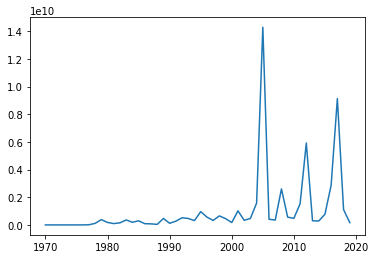

In [21]:
# by year
claims_yr = claims.groupby('yearofloss').sum()

plt.plot(claims_yr['claims_amount']);

In [22]:
print('mean building claim:', claims.amountpaidonbuildingclaim.mean()),
print('median building claim:', claims.amountpaidonbuildingclaim.median()),
print('mean contents claim:', claims.amountpaidoncontentsclaim.mean()),
print('median contents claim:', claims.amountpaidoncontentsclaim.median())

mean building claim: 23617.93550298017
median building claim: 4787.36
mean contents claim: 7720.713884487735
median contents claim: 225.345


/home/samuel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/samuel/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


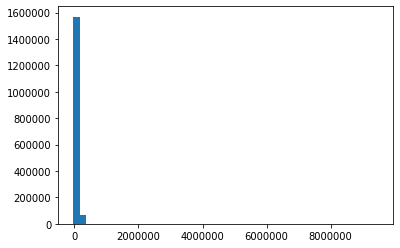

In [23]:
plt.hist(claims["claims_amount"], bins = 50);

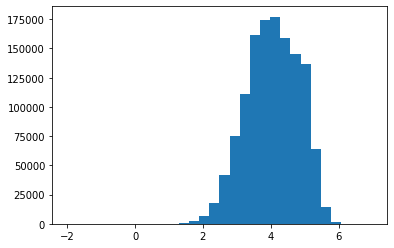

In [24]:
claims_nonzero = claims[claims['claims_amount'] > 0]
claims_series = claims_nonzero['claims_amount']

logged_claims_series= np.log10(claims_series)

plt.hist(logged_claims_series, bins = 30);

In [25]:
# want that logged series back in our dataframe:

claims['logged_claims'] = logged_claims_series

In [26]:
# and states...

claims.state.value_counts()

LA    457271
TX    371025
FL    295144
NJ    192563
NY    169369
NC    101128
PA     73110
MS     62568
IL     51651
CA     50271
MO     49701
VA     48997
SC     45706
AL     40586
MA     34384
CT     28106
WV     27297
OH     27181
PR     25602
KY     24464
MD     23772
GA     21364
IN     18693
TN     15385
IA     14310
WA     14019
ND     13205
MI     12819
OK     12650
MN     12091
AR      9462
WI      8428
KS      7635
RI      6578
NE      6080
DE      6055
OR      5821
HI      5386
CO      5242
AZ      4933
ME      4671
NH      3983
SD      3609
VI      3534
VT      2814
MT      2101
NV      1851
NM      1365
ID      1072
UT      1055
AK       662
WY       541
DC       397
GU       159
AS        10
Name: state, dtype: int64

In [27]:
# want only DE, NJ, and PA

de_bay_claims = claims[claims['state'].isin(['DE', 'NJ', 'PA'])]

de_bay_claims

,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,...,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzipcode,primaryresidence,claims_amount,logged_claims
71,NaN,2019-06-30,10.0,0.0,BRIGANTINE,N,1.0,34001.0,0.2,2012-10-29,...,1,NaN,NJ,250000.0,100000.0,2012,8203,Y,45187.00,4.655014
79,NaN,2019-06-30,NaN,1.0,MOUNT HOLLY SPR,N,1.0,42041.0,0.0,2006-06-27,...,1,NaN,PA,100000.0,4400.0,2006,17065,Y,25727.59,4.410399
119,NaN,2019-06-30,6.0,3.0,LAVALLETTE,N,1.0,34029.0,0.0,2012-10-29,...,2,NaN,NJ,119800.0,11000.0,2012,8735,N,55823.47,4.746817
164,NaN,2019-06-30,NaN,1.0,BELMAR,N,1.0,34025.0,0.0,2010-03-31,...,7,NaN,NJ,250000.0,100000.0,2010,7719,Y,1850.00,3.267172
182,NaN,2019-06-30,4.0,2.0,BETHANY BEACH,N,1.0,10005.0,0.1,2009-11-12,...,1,NaN,DE,217000.0,18300.0,2009,19930,N,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427830,NaN,2019-06-30,6.0,3.0,SEASIDE PARK,N,1.0,34029.0,0.1,2012-10-29,...,1,NaN,NJ,250000.0,100000.0,2012,8752,N,8694.60,3.939250
2427831,NaN,2019-06-30,NaN,0.0,PLEASANTVILLE,N,1.0,34001.0,0.0,2012-10-29,...,1,NaN,NJ,20000.0,0.0,2012,8232,N,NaN,NaN
2427832,NaN,2019-06-30,5.0,4.0,BRICK,N,1.0,34029.0,0.0,2012-10-29,...,2,NaN,NJ,220000.0,10500.0,2012,8723,Y,9445.58,3.975229
2427833,NaN,2019-06-30,NaN,3.0,NEWARK,N,1.0,34013.0,0.0,2012-10-29,...,1,NaN,NJ,167500.0,10000.0,2012,7105,Y,44696.54,4.650274


In [28]:
# drop a few columns and rearrange column names a bit:

de_bay_claims = de_bay_claims[["censustract", "reportedcity", "countycode", "state", "reportedzipcode", "latitude", "longitude",
                                 "yearofloss", "dateofloss",
                                 "elevatedbuildingindicator", "lowestfloorelevation", "originalconstructiondate",
                                 "primaryresidence", "crsdiscount", "postfirmconstructionindicator", "floodzone",
                                 "amountpaidonbuildingclaim", "amountpaidoncontentsclaim", "claims_amount", "logged_claims",
                                 "totalbuildinginsurancecoverage", "totalcontentsinsurancecoverage", "ratemethod"]]
de_bay_claims

,censustract,reportedcity,countycode,state,reportedzipcode,latitude,longitude,yearofloss,dateofloss,elevatedbuildingindicator,...,crsdiscount,postfirmconstructionindicator,floodzone,amountpaidonbuildingclaim,amountpaidoncontentsclaim,claims_amount,logged_claims,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,ratemethod
71,3.400101e+10,BRIGANTINE,34001.0,NJ,8203,39.4,-74.4,2012,2012-10-29,N,...,0.2,Y,AE,40603.53,4583.47,45187.00,4.655014,250000.0,100000.0,1
79,4.204101e+10,MOUNT HOLLY SPR,42041.0,PA,17065,40.1,-77.2,2006,2006-06-27,N,...,0.0,N,AE,21327.59,4400.00,25727.59,4.410399,100000.0,4400.0,1
119,3.402972e+10,LAVALLETTE,34029.0,NJ,8735,40.0,-74.1,2012,2012-10-29,Y,...,0.0,Y,AE,46503.59,9319.88,55823.47,4.746817,119800.0,11000.0,2
164,3.402581e+10,BELMAR,34025.0,NJ,7719,40.2,-74.0,2010,2010-03-31,N,...,0.0,N,X,1850.00,0.00,1850.00,3.267172,250000.0,100000.0,7
182,1.000505e+10,BETHANY BEACH,10005.0,DE,19930,38.5,-75.1,2009,2009-11-12,Y,...,0.1,Y,AE,0.00,0.00,0.00,NaN,217000.0,18300.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427830,3.402973e+10,SEASIDE PARK,34029.0,NJ,8752,39.9,-74.1,2012,2012-10-29,Y,...,0.1,Y,AE,8694.60,0.00,8694.60,3.939250,250000.0,100000.0,1
2427831,3.400101e+10,PLEASANTVILLE,34001.0,NJ,8232,39.4,-74.5,2012,2012-10-29,Y,...,0.0,N,A05,0.00,NaN,NaN,NaN,20000.0,0.0,1
2427832,3.402971e+10,BRICK,34029.0,NJ,8723,40.0,-74.1,2012,2012-10-29,N,...,0.0,Y,AE,9445.58,0.00,9445.58,3.975229,220000.0,10500.0,2
2427833,3.401301e+10,NEWARK,34013.0,NJ,7105,40.7,-74.1,2012,2012-10-29,Y,...,0.0,N,AE,44195.04,501.50,44696.54,4.650274,167500.0,10000.0,1


**Shoreline Cover**

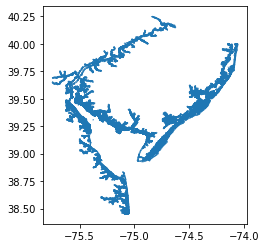

In [29]:
de_bay_esi.plot()

In [30]:
de_bay_esi.head()

,ESI,LINE,SOURCE_ID,ENVIR,ESI_SOURCE,Shape_Length,Most_Sensitive,Landward_shoretype,Seaward_shoretype1,Seaward_shoretype2,General_Symbol,Generalized_ESI_Type,geometry
0,6A,S,14,E,9,0.002248,6A,6A: Gravel beaches,,,3,Beaches (sand or gravel),"MULTILINESTRING ((-74.81961 40.23902, -74.8199..."
1,10C/5,S,14,E,9,0.021676,10C,10C: Swamps,5: Mixed sand and gravel beaches,,5,Vegetated (grass/marsh/mangroves/scrub-shrub) ...,"MULTILINESTRING ((-74.81915 40.23957, -74.8189..."
2,10C/5,S,14,E,9,0.005124,10C,10C: Swamps,5: Mixed sand and gravel beaches,,5,Vegetated (grass/marsh/mangroves/scrub-shrub) ...,"MULTILINESTRING ((-74.80765 40.23479, -74.8078..."
3,6A,S,14,E,9,0.001719,6A,6A: Gravel beaches,,,3,Beaches (sand or gravel),"MULTILINESTRING ((-74.80630 40.23447, -74.8063..."
4,10D/5,S,11,E,9,0.001167,10D,10D: Scrub-shrub wetlands,5: Mixed sand and gravel beaches,,5,Vegetated (grass/marsh/mangroves/scrub-shrub) ...,"MULTILINESTRING ((-74.80537 40.23384, -74.8057..."


*note*: first want to highlight shoreline types that are classified as man-made or armored vs wetlands/ other

https://response.restoration.noaa.gov/oil-and-chemical-spills/oil-spills/resources/shoreline-sensitivity-rankings-list

- 1B 	Exposed, solid man-made structures
- 8B 	Sheltered, solid man-made structures/ Sheltered rocky shores (permeable)*
- 6B 	Riprap/ Gravel beaches (cobbles and boulders)*
- 10 codes indicate some form of wetlands

In [31]:
de_bay_esi.ESI.value_counts()

10A          8150
10A/9A       3845
8B           1712
10C          1207
1B           1202
             ... 
8C/8B/9A        1
10D/10A/4       1
6A/5            1
10A/1B/3A       1
3A/6B/7         1
Name: ESI, Length: 334, dtype: int64

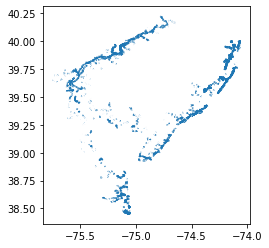

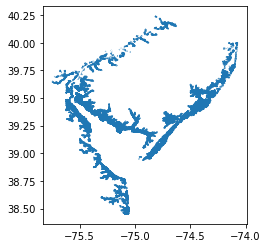

In [32]:
de_esi_armor = de_bay_esi[de_bay_esi.ESI.str.contains('|'.join(['1B','8B','6B']))]

de_esi_wetlands = de_bay_esi[de_bay_esi.ESI.str.contains('10')]

de_esi_armor.plot(),
de_esi_wetlands.plot();

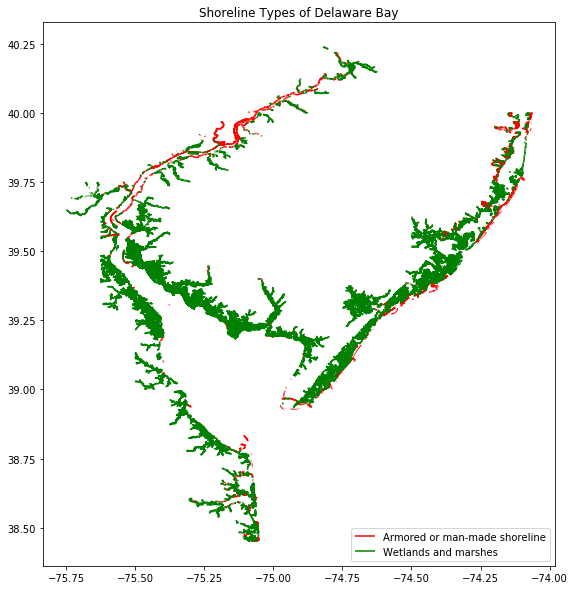

In [33]:
fig, ax = plt.subplots(figsize = (10,10))
de_esi_armor.plot(ax = ax, color = 'r', label = 'Armored or man-made shoreline')
de_esi_wetlands.plot(ax=ax, color = 'g', label = 'Wetlands and marshes')
ax.legend(loc = 'lower right')
ax.set_title('Shoreline Types of Delaware Bay');

## Merging Data

*note*: I had lots of trouble trying to subset census tracts to only those intersecting the shoreline file... 

I eventually had to just select some of the census tracts via GIS and reuploaded....

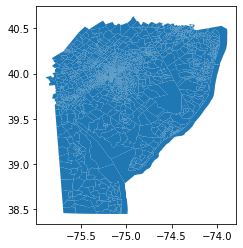

In [34]:
coastal_file = "data/DE_data/census_tracts_coastal/ct_coastal.shp"
coastal_ct = gp.read_file(coastal_file)

coastal_ct.plot();

In [35]:
print(coastal_ct.GEOID.dtype),
print(de_bay_claims.censustract.dtype)

int64
float64


In [36]:
coastal_ct['GEOID'] = coastal_ct['GEOID'].astype(int)

print(coastal_ct['GEOID'].dtype)

int64


In [37]:
de_bay_claims_2 = de_bay_claims[de_bay_claims.censustract.notnull()]

de_bay_claims_2['censustract'] = de_bay_claims_2['censustract'].astype(int)

print(de_bay_claims_2['censustract'].dtype)

int64


/home/samuel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
print("shape file census tracts ('GEOID'):", coastal_ct.GEOID.head()),
print('number unique:', coastal_ct.GEOID.nunique()),
print(''),
print("NFIP data census tracts ('censustract'):", de_bay_claims_2.censustract.head())
print('number unique:', de_bay_claims_2.censustract.nunique())

shape file census tracts ('GEOID'): 0    10003010800
1    10005051007
2    10005050408
3    10003014909
4    10005050601
Name: GEOID, dtype: int64
number unique: 2144

NFIP data census tracts ('censustract'): 71     34001010102
79     42041012600
119    34029722500
164    34025808401
182    10005051204
Name: censustract, dtype: int64
number unique: 4999


In [39]:
claims_shp = coastal_ct.merge(de_bay_claims_2, left_on='GEOID', right_on = 'censustract')

## Plotting

/home/samuel/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


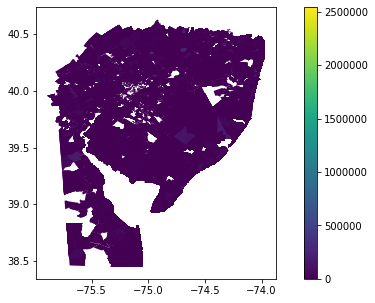

In [40]:
claims_shp.plot(column="claims_amount", cmap="viridis", legend=True, figsize=(10, 5))

/home/samuel/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


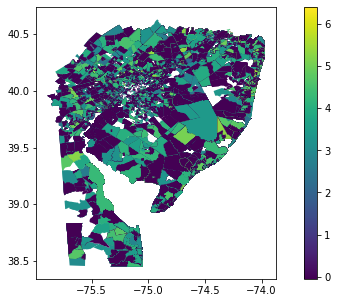

In [34]:
claims_shp.plot(column="logged_claims", cmap="viridis", legend=True, figsize=(10, 5))

In [41]:
print('total claims min and max:', claims_shp.claims_amount.min(), "-", claims_shp.claims_amount.max()),
print('logged claims min and max:', claims_shp.logged_claims.min(), "-", claims_shp.logged_claims.max())

total claims min and max: 0.0 - 2545308.74
logged claims min and max: -0.05060999335508721 - 6.405740468773356


/home/samuel/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/home/samuel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


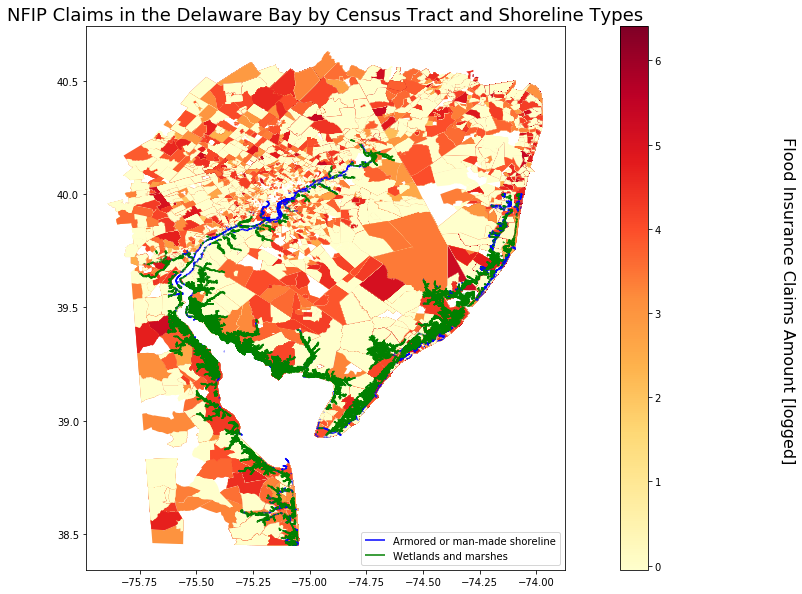

In [42]:
# Plot.........

fig, ax = plt.subplots(figsize=(20, 10))
ax.grid(False)
claims_shp.plot(ax=ax, column="logged_claims", cmap="YlOrRd", legend=True)
fig.text(0.9, 0.5, 
         "Flood Insurance Claims Amount [logged]", 
         rotation=-90, va="center", ha="center", 
         fontsize=16)
de_esi_armor.plot(ax = ax, color = 'blue', label = 'Armored or man-made shoreline')
de_esi_wetlands.plot(ax=ax, color = 'green', label = 'Wetlands and marshes')
ax.legend(loc = 'lower right')
ax.set_title('NFIP Claims in the Delaware Bay by Census Tract and Shoreline Types', fontsize = 18)
plt.savefig('data/DE_data/Fielding_DE_NFIP_map.png')
fig.show();

## Conclusions and future work

I tried to add an urban areas/ population density layer to the map, however, this ended up being not so simple. Likewise, adding a basemap would be helpful visually however also gave me much trouble. I may look into adding these at a future point. 

Further, as mentioned in the beginning, it would be nice to model drivers of NFIP claims, and to see what, if any, impact shoreline type has on these amounts. As it stands now, however, I just have the map, as well as experience working with these data.

In [43]:
#To do to clean up a bit.....
# no NFIP claims per capita: import census tract level on population
# add Cartopy base map of states borders
# then could add other demographic information: income, housing prices, age, etc